<span style='color:Blue'> <span style="font-size:25px;"> **[3-BRSA-1215-RJS] Loading-Sorting-Preprocessing-create log plot-export CSV file of a DLIS file**

In [28]:
%%capture

%pip install dlisio                                                   
%pip install qbstyles                                                 
%pip install folium 
%pip install geopandas

from dlisio import dlis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches                                 

import folium                                                         
from folium import plugins 
import json                                                           

from qbstyles import mpl_style
mpl_style(dark=False)                                                 

from matplotlib_inline.backend_inline import set_matplotlib_formats   
set_matplotlib_formats('svg')                                         

<span style='color:brown'> <span style="font-size:19px;"> **STEP 2: load all the required DLIS files**

In [29]:
dlis0, *tail0 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-1215-RJS/Perfil Convencional/3-brsa-1215-rjs_8_cbil.dlis')
dlis1, *tail1 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-1215-RJS/Perfil Convencional/3-brsa-1215-rjs_8_flex_mrex.dlis')
dlis2, *tail2 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-1215-RJS/Perfil Convencional/3-brsa-1215-rjs_8_xmac_hdil.dlis')      # NMR
dlis3, *tail3 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-1215-RJS/Perfil Convencional/3-brsa-1215-rjs_12_xma_6cal.dlis')
dlis4, *tail4 = dlis.load('/Users/amirhosseinakhondzadeh/@ DATA/3-BRSA-1215-RJS/Perfil Convencional/3-brsa-1215-rjs_8_prov.dlis')  #

In [30]:
# Define a list of dlis object names (assuming dlis0, dlis1, ..., dlis9 exist)
dlis_names = [f'dlis{i}' for i in range(5)]

# Define depth_units
depth_units = "in"  # Replace "units" with the actual units you want to use

for dlis_name in dlis_names:
    dlis = globals()[dlis_name]  # Get the dlis object using its name
    print("=" * 80)
    print(f"DLIS Object: {dlis_name}")
    print("=" * 80)

    for frame in dlis.frames:
        print(f"Frame Name:         {frame.name}")
        print(f"Number of Channels: {len(frame.channels)}")
        print(f"Depth Interval:     {frame.index_min} - {frame.index_max} {depth_units}")
        print(f"Depth Spacing:      {frame.spacing} {depth_units}")
        print(f"Channel Names:      {', '.join(channel.name for channel in frame.channels)}")
        print("-" * 80)

    print("%" * 80)

DLIS Object: dlis0
Frame Name:         0_005080B0
Number of Channels: 64
Depth Interval:     5392.1352 - 5675.8278 in
Depth Spacing:      0.005080000031739473 in
Channel Names:      TDEP, AAVQH, ALRTMQH, AMAXQH, AMEDQH, AMINQH, ARAD1QH, ARAD2QH, ARAD3QH, ARAD4QH, ARADS5QH, ATTENQH, BHDCBMQH, BHDCBQH, BHTA5QH, BHTT5QH, DCNTQH, FAMPQH, FATNQH, FGATQH, FIMPQH, FLDGNQH, FTIMQH, HVPSQH, HVPSVQH, MXSPDQH, NCNTDQH, NCNTQH, NSCNQH, PAGAVMQH, QDUPQH, QRTFQH, QRTTQH, QSPDQH, QSPNQH, RADQH, RAMP5QH, RBT1CBQH, RBT2CBQH, RBT3CBQH, RBT4CBQH, RGATQH, RTAVQH, RTMDQH, SANGQH, SFLDFQH, SFLDMQH, SFLDQH, SGAINQH, SGATQH, SIGQH, SNGQH, SNUMQH, SPERQH, STIMQH, TENCB, TENEI, TRIGQH, TVSLPQH, W106EQH, W106FQH, W106S1QH, W106S2QH, XDCRQH
--------------------------------------------------------------------------------
Frame Name:         0_002540B1
Number of Channels: 148
Depth Interval:     5379.1863 - 5676.2139 in
Depth Spacing:      0.0025400000158697367 in
Channel Names:      TDEP, AGNDQH, AOFFQH, AZCBQH, A

<span style='color:green'> <span style="font-size:19px;"> **STEP 2: create Pandas DataFrames containing all the required Well Log Data**

GR

Dlis0
0_076200B2

Dlis1
0_076200B3

Dlis2
0_076200B0

dlis3
0_076200B0

========
Resistivity

Dlis2
0_076200B2

M2R1, M2R3, M2R9

========
Formation bulk density

Dlis2
0_076200B0

ZDEN .g/cm3

========
neutron porosity

Dlis2
0_076200B2

CNC

========
Sonic

Dlis2
0_152400B1

DT24QI   .us/ft

========
Photoelectric 

Dlis2
0_076200B0

PE .b/e

========
NMR

dlis4
B810276

FFV_PV free fluid
MRP_PV Total porosity
FFV_3MS_PV effective porosity

========



In [31]:
# Create variable "f" which stands for frame
f0 = dlis0.object('FRAME','0_076200B2')   # GR
f1 = dlis1.object('FRAME','0_076200B3')   # GR
f2 = dlis2.object('FRAME','0_076200B0')   # GR, RHOZ, PEFZ
f3 = dlis2.object('FRAME','0_152400B1')   # DTCO
f4 = dlis2.object('FRAME','0_076200B2')   # NPHI, AT
f5 = dlis3.object('FRAME','0_076200B0')   # GR
f6 = dlis4.object('FRAME','B810276')      # NMR

In [32]:
# Create variables "c" which stands for channel
c0 = f0.curves()
c1 = f1.curves()
c2 = f2.curves()
c3 = f3.curves()
c4 = f4.curves()
c5 = f5.curves()
c6 = f6.curves()

In [33]:
# Define the channels/logging curves of interest for each frame "f"
# Convert DEPTH values to metres, by multiplying by 0.00254. 
# *0.00254

d0 = {'DEPTH'      : c0['TDEP'],
       'GR'        : c0['GR']}


d1  = {'DEPTH'     : c1['TDEP'],
       'GR'        : c1['GR']}

d2  = {'DEPTH'   : c2['TDEP'],
       'GR'      : c2['GR'],
       'RHOZ'    : c2['ZDEN'],
       'PEFZ'    : c2['PE']}

d3  = {'DEPTH'   : c3['TDEP'],
       'DTCO'    : c3['DT24QI']}

d4  = {'DEPTH'   : c4['TDEP'],
       'NPHI'    : c4['CNC']/100,
       'AT10'    : c4['M2R1'],
       'AT30'    : c4['M2R3'],
       'AT90'    : c4['M2R9']}

d5  = {'DEPTH'   : c5['TDEP'],
       'GR'      : c5['GR']}

d6  = {'DEPTH'   : c6['TDEP'],
       'NMRFF'   : c6['FFV_PV'],
       'NMREFF'  : c6['FFV_3MS_PV'],
       'NMRTOT'  : c6['MRP_PV']}

In [34]:
# Create dataframes containing the required well logging curves 
df0 = pd.DataFrame(d0)
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.DataFrame(d3)
df4 = pd.DataFrame(d4)
df5 = pd.DataFrame(d5)
df6 = pd.DataFrame(d6)

In [35]:
# Print the dataframes 
df0, df1, df2, df3, df4, df5, df6

(          DEPTH      GR
 0     5379.2628 -999.25
 1     5379.3390 -999.25
 2     5379.4152 -999.25
 3     5379.4914 -999.25
 4     5379.5676 -999.25
 ...         ...     ...
 4033  5686.5774 -999.25
 4034  5686.6536 -999.25
 4035  5686.7298 -999.25
 4036  5686.8060 -999.25
 4037  5686.8822 -999.25
 
 [4038 rows x 2 columns],
           DEPTH          GR
 0     5404.1040   14.798996
 1     5404.1802   14.553776
 2     5404.2564   14.430213
 3     5404.3326   14.413992
 4     5404.4088   14.477777
 ...         ...         ...
 3703  5686.2726 -999.250000
 3704  5686.3488 -999.250000
 3705  5686.4250 -999.250000
 3706  5686.5012 -999.250000
 3707  5686.5774 -999.250000
 
 [3708 rows x 2 columns],
           DEPTH      GR    RHOZ    PEFZ
 0     5275.8594 -999.25 -999.25 -999.25
 1     5275.9356 -999.25 -999.25 -999.25
 2     5276.0118 -999.25 -999.25 -999.25
 3     5276.0880 -999.25 -999.25 -999.25
 4     5276.1642 -999.25 -999.25 -999.25
 ...         ...     ...     ...     ...
 5384  56

<span style='color:brown'> <span style="font-size:19px;"> **STEP 3: Data Pre-Processing**

In [36]:
# Remove "-999.250000" from each dataframe. It does not make any sense.

df0.drop(df0.loc[df0['GR']==-999.25].index, inplace=True)
df1.drop(df1.loc[df1['GR']==-999.25].index, inplace=True)

df2.drop(df2.loc[df2['GR']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['RHOZ']==-999.25].index, inplace=True)
df2.drop(df2.loc[df2['PEFZ']==-999.25].index, inplace=True)

df3.drop(df3.loc[df3['DTCO']==-999.25].index, inplace=True)

df4.drop(df4.loc[df4['NPHI']==-999.25].index, inplace=True)
df4.drop(df4.loc[df4['AT10']==-999.25].index, inplace=True)
df4.drop(df4.loc[df4['AT30']==-999.25].index, inplace=True)
df4.drop(df4.loc[df4['AT90']==-999.25].index, inplace=True)

df5.drop(df5.loc[df5['GR']==-999.25].index, inplace=True)

df6.drop(df6.loc[df6['NMRFF']==-999.25].index, inplace=True)
df6.drop(df6.loc[df6['NMREFF']==-999.25].index, inplace=True)
df6.drop(df6.loc[df6['NMRTOT']==-999.25].index, inplace=True)

In [37]:
# Reset the Index of each dataframe 
# (drop=True) means that the current Index will be replaced entirely 
df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True) 
df4 = df4.reset_index(drop=True) 
df5 = df5.reset_index(drop=True)
df6 = df6.reset_index(drop=True)

In [38]:
df0, df1, df2, df3, df4, df5, df6

(          DEPTH         GR
 0     5383.7586   6.786991
 1     5383.8348   7.043399
 2     5383.9110   7.224220
 3     5383.9872   7.298354
 4     5384.0634   7.273054
 ...         ...        ...
 3566  5655.4878  62.415112
 3567  5655.5640  62.534981
 3568  5655.6402  62.592705
 3569  5655.7164  62.652760
 3570  5655.7926  62.756260
 
 [3571 rows x 2 columns],
           DEPTH         GR
 0     5404.1040  14.798996
 1     5404.1802  14.553776
 2     5404.2564  14.430213
 3     5404.3326  14.413992
 4     5404.4088  14.477777
 ...         ...        ...
 3520  5672.3280  74.378677
 3521  5672.4042  74.657570
 3522  5672.4804  74.883408
 3523  5672.5566  75.036873
 3524  5672.6328  75.111031
 
 [3525 rows x 2 columns],
           DEPTH         GR      RHOZ       PEFZ
 0     5342.8392   6.695138  2.068856  12.337516
 1     5342.9154   6.795468  2.064306  12.291166
 2     5342.9916   6.879280  2.058986  12.279386
 3     5343.0678   6.900757  2.055389  12.308822
 4     5343.1440   6.867018

In [39]:
 df0.describe(), df1.describe(), df2.describe(), df3.describe(), df4.describe(), df5.describe(), df6.describe()

(             DEPTH           GR
 count  3571.000000  3571.000000
 mean   5519.775600    25.580753
 std      78.562446    12.801146
 min    5383.758600     6.122140
 25%    5451.767100    14.015810
 50%    5519.775600    25.118114
 75%    5587.784100    34.868076
 max    5655.792600    77.298996,
              DEPTH           GR
 count  3525.000000  3525.000000
 mean   5538.368400    40.295094
 std      77.550582    16.859015
 min    5404.104000    12.793592
 25%    5471.236200    24.720978
 50%    5538.368400    38.687340
 75%    5605.500600    51.494438
 max    5672.632800   127.199844,
              DEPTH           GR         RHOZ         PEFZ
 count  4106.000000  4106.000000  4106.000000  4106.000000
 mean   5499.239700    24.029778     2.397589     5.997816
 std      90.330866    15.037915     0.402529     3.320165
 min    5342.839200     5.450577    -2.608082     0.401903
 25%    5421.039450    11.056881     2.414291     4.213752
 50%    5499.239700    21.941525     2.561608     

<span style='color:brown'> <span style="font-size:19px;"> **STEP 4: Create dataframe of each well-log data [unique dataframe] to plot them versus depth**

**GR log**

**GR:**
* df0 ==> 5383.7586 - 5655.7926
* df1 ==> 5404.1040 - 5672.6328
* df2 ==> 5342.8392 - 5655.6402
* df5 ==> 4741.1640 - 5397.5508

In [40]:
# We consider df4 and df8 (only the DEPTH and GR columns)
df0_GR = df0
df1_GR = df1
df2_GR = df2.drop(columns=["RHOZ", "PEFZ"])
df5_GR = df5

df0_GR, df1_GR, df2_GR, df5_GR

(          DEPTH         GR
 0     5383.7586   6.786991
 1     5383.8348   7.043399
 2     5383.9110   7.224220
 3     5383.9872   7.298354
 4     5384.0634   7.273054
 ...         ...        ...
 3566  5655.4878  62.415112
 3567  5655.5640  62.534981
 3568  5655.6402  62.592705
 3569  5655.7164  62.652760
 3570  5655.7926  62.756260
 
 [3571 rows x 2 columns],
           DEPTH         GR
 0     5404.1040  14.798996
 1     5404.1802  14.553776
 2     5404.2564  14.430213
 3     5404.3326  14.413992
 4     5404.4088  14.477777
 ...         ...        ...
 3520  5672.3280  74.378677
 3521  5672.4042  74.657570
 3522  5672.4804  74.883408
 3523  5672.5566  75.036873
 3524  5672.6328  75.111031
 
 [3525 rows x 2 columns],
           DEPTH         GR
 0     5342.8392   6.695138
 1     5342.9154   6.795468
 2     5342.9916   6.879280
 3     5343.0678   6.900757
 4     5343.1440   6.867018
 ...         ...        ...
 4101  5655.3354  66.955200
 4102  5655.4116  67.184494
 4103  5655.4878  67

In [41]:
# We consider df4_GR (only from 5207.799991 m down to 5807.099999 m)
#df5_GR = df5
df5_GR = df5_GR.drop(df5_GR.index[8000:])

#df2_GR = df2.drop(columns=["RHOZ", "PEFZ"])
df2_GR = df2_GR[(df2_GR.index >= 104) & (df2_GR.index <= 790)]

In [42]:
df_GR = pd.concat([df5_GR, df2_GR, df1_GR], axis = 0, ignore_index = True)
df_GR

,DEPTH,GR
0,4741.1640,18.516951
1,4741.2402,18.268799
2,4741.3164,17.959248
3,4741.3926,17.683407
4,4741.4688,17.489735
...,...,...
12207,5672.3280,74.378677
12208,5672.4042,74.657570
12209,5672.4804,74.883408
12210,5672.5566,75.036873


**Resistivity log**

**RT:**
* DLIS 3 ==> 5056.699988 - 5807.099999

In [43]:
df_AT = df4.drop(columns=["NPHI"])
df_AT

,DEPTH,AT10,AT30,AT90
0,5393.2074,392.297791,352.324921,389.439178
1,5393.2836,390.077545,349.879303,388.638580
2,5393.3598,386.690552,346.377686,387.205750
3,5393.4360,383.181976,342.831329,385.624054
4,5393.5122,380.658295,340.268829,384.437378
...,...,...,...,...
3777,5681.0148,142.149979,64.930473,33.959743
3778,5681.0910,143.724808,65.170578,34.067352
3779,5681.1672,143.807266,65.179726,34.098015
3780,5681.2434,142.845383,65.069069,34.083256


**Nuetron Porosity Log**

**NPHI:**

In [44]:
df_NPHI = df4.drop(columns=["AT10", "AT30", "AT90"])
df_NPHI

,DEPTH,NPHI
0,5393.2074,-9.992500
1,5393.2836,0.009032
2,5393.3598,0.006938
3,5393.4360,0.005212
4,5393.5122,0.003916
...,...,...
3777,5681.0148,-9.992500
3778,5681.0910,-9.992500
3779,5681.1672,-9.992500
3780,5681.2434,-9.992500


**Bulk Density Log**

**RHOZ:**

In [45]:
df_RHOZ = df2.drop(columns=["GR", "PEFZ"])
df_RHOZ

,DEPTH,RHOZ
0,5342.8392,2.068856
1,5342.9154,2.064306
2,5342.9916,2.058986
3,5343.0678,2.055389
4,5343.1440,2.054573
...,...,...
4101,5655.3354,2.470275
4102,5655.4116,2.468500
4103,5655.4878,2.467419
4104,5655.5640,2.466278


**Compressional Wave Sonic Log**

**DTCO:**

In [46]:
df_DTCO = df3
df_DTCO

,DEPTH,DTCO
0,5363.7180,57.403435
1,5363.8704,57.662338
2,5364.0228,57.943832
3,5364.1752,58.105968
4,5364.3276,57.987888
...,...,...
1988,5666.6892,70.395264
1989,5666.8416,70.549294
1990,5666.9940,71.144608
1991,5667.1464,71.803658


**photoelecteric Factor**

**PEFZ:**

In [47]:
df_PEFZ = df2.drop(columns=["GR", "RHOZ"])
df_PEFZ

,DEPTH,PEFZ
0,5342.8392,12.337516
1,5342.9154,12.291166
2,5342.9916,12.279386
3,5343.0678,12.308822
4,5343.1440,12.382683
...,...,...
4101,5655.3354,4.422517
4102,5655.4116,4.433830
4103,5655.4878,4.406158
4104,5655.5640,4.356368


**NMR (Nuclear MAgnetic Resonance)**

**NMR:**

In [48]:
df_NMR = df6
df_NMR

,DEPTH,NMRFF,NMREFF,NMRTOT
0,5399.989258,1.279305e-07,2.403594e-07,3.000000e-07
1,5400.141602,1.279305e-07,2.403594e-07,3.000000e-07
2,5400.293945,1.279305e-07,2.403594e-07,3.000000e-07
3,5400.446289,1.279305e-07,2.403594e-07,3.000000e-07
4,5400.598633,1.279305e-07,2.403594e-07,3.000000e-07
...,...,...,...,...
1687,5657.091797,7.319759e-03,1.667861e-02,3.648243e-02
1688,5657.244141,6.578413e-03,1.568843e-02,3.507892e-02
1689,5657.396484,5.272076e-03,1.733669e-02,4.239086e-02
1690,5657.548828,4.373246e-03,1.947336e-02,5.239506e-02


df0_GR

df0_RT10
df0_RT20
df0_RT30
df0_RT60
df0_RT90

df0_NPHI

df0_RHOB

df0_DTC


df0_MPHIT1
df0_MPHIT2

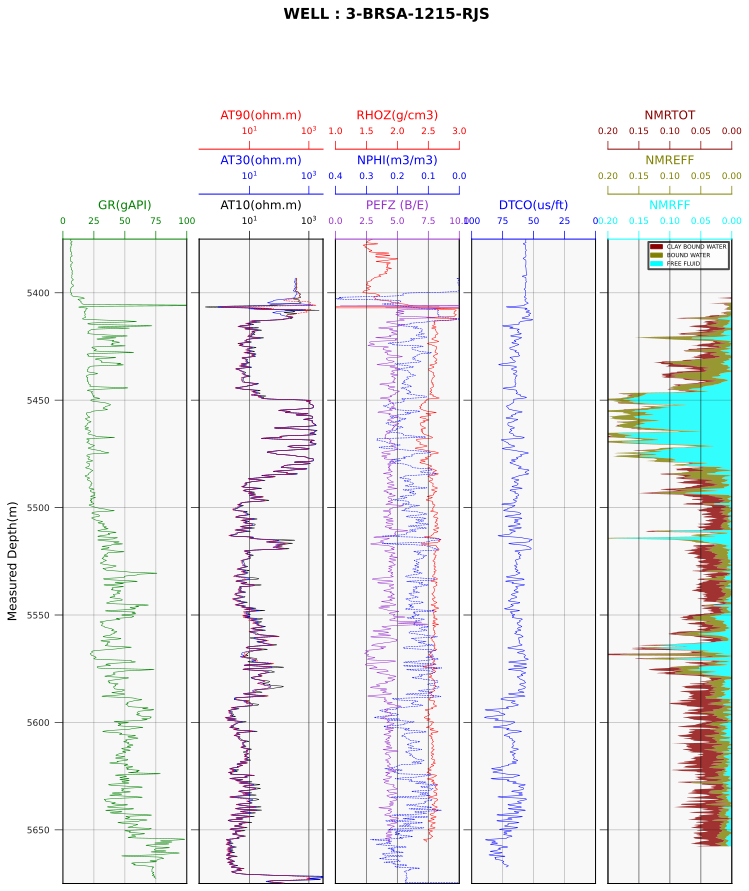

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,14))
fig.suptitle("WELL : 3-BRSA-1215-RJS", fontsize=15, fontweight='bold')
fig.subplots_adjust(top=0.75, wspace=0.5)

track_names = ['GR(gAPI)','AT10(ohm.m)','AT30(ohm.m)','AT90(ohm.m)','NPHI(m3/m3)','RHOZ(g/cm3)', 'PEFZ (B/E)','DTCO(us/ft)','NMREFF','NMRFF','NMRTOT']

#Set up the subplots grid
ax1 = plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)    # GR  

ax2 = plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)    # AT      
ax3 = ax2.twiny()
ax4 = ax2.twiny()

ax5 = plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)    # RHOB
ax6 = ax5.twiny()                                          # NPHI
ax7 = ax5.twiny()                                          # PEFZ

ax8 = plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)    # DTCO

ax9 = plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)    # NMR
ax10 = ax9.twiny()
ax11 = ax9.twiny()


####################################################################


# First Track: GR
ax1.plot("GR","DEPTH", data = df_GR, color = "green", lw = 0.5)            # To call the data from the df dataframe 
ax1.set_xlim(0,100)                                                      
ax1.spines['top'].set_position(('outward',0)) 
ax1.set_xlabel('GR(gAPI)',color='green')  
ax1.set_ylabel('Measured Depth(m)',color='black') 
ax1.tick_params(axis='x', colors='green')
ax1.spines["top"].set_edgecolor("green")


# Second Track: RT90, RT30, AT10
ax2.plot("AT10","DEPTH", data= df_AT, color="black", lw = 0.5)
ax2.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax2.semilogx()                                                           # x in a log scale
ax2.spines['top'].set_position(('outward',0))
ax2.set_xlabel('AT10(ohm.m)', color='black') 
ax2.tick_params(axis='x', colors='black')
ax2.spines["top"].set_edgecolor("black")

ax3.plot("AT30","DEPTH", data= df_AT, color="blue", lw = 0.5)
ax3.set_xlim(0.2,3000)                                                   # [0.2-2000] is the typical rang
ax3.semilogx()                                                           # x in a log scale
ax3.spines['top'].set_position(('outward',45))
ax3.set_xlabel('AT30(ohm.m)', color='blue') 
ax3.tick_params(axis='x', colors='blue')
ax3.spines["top"].set_edgecolor("blue")

ax4.plot("AT90","DEPTH", data= df_AT, color="red", lw = 0.5, linestyle = '--')
ax4.set_xlim(0.2,3000)                                                    
ax4.semilogx()                                                            
ax4.spines['top'].set_position(('outward',90))
ax4.set_xlabel('AT90(ohm.m)', color='red') 
ax4.tick_params(axis='x', colors='red')
ax4.spines["top"].set_edgecolor("red")


# Third Track: RHOZ, NPHI

ax5.plot("RHOZ","DEPTH", data= df_RHOZ, color="red", lw = 0.5)
ax5.set_xlim(1,3)
ax5.spines['top'].set_position(('outward',90))
ax5.set_xlabel('RHOZ(g/cm3)', color='red') 
ax5.tick_params(axis='x', colors='red')
ax5.spines["top"].set_edgecolor("red")


ax6.plot("NPHI","DEPTH", data= df_NPHI, color="blue", lw = 0.5, linestyle = '--')
ax6.set_xlim(0.4,0)                                                         
ax6.spines['top'].set_position(('outward',45))
ax6.set_xlabel('NPHI(m3/m3)', color='blue') 
ax6.tick_params(axis='x', colors='blue')
ax6.spines["top"].set_edgecolor("blue")


# Forth Track: PEFZ
ax7.plot("PEFZ","DEPTH", data= df_PEFZ, color="darkorchid", lw = 0.5)
ax7.set_xlim(0,10)                                                      
ax7.spines['top'].set_position(('outward',0))
ax7.set_xlabel('PEFZ (B/E)', color='darkorchid') 
ax7.tick_params(axis='x', colors='darkorchid')
ax7.spines["top"].set_edgecolor("darkorchid")


# Fifth Track: DTCO
ax8.plot("DTCO","DEPTH", data= df_DTCO, color="blue", lw = 0.5)
ax8.set_xlim(100,0)                                                      
ax8.spines['top'].set_position(('outward',0))
ax8.set_xlabel('DTCO(us/ft)', color='blue') 
ax8.tick_params(axis='x', colors='blue')
ax8.spines["top"].set_edgecolor("blue")



# Sixth Track: NMR
ax9.plot("NMRTOT","DEPTH", data= df_NMR, color="darkred", lw = 0)
ax9.set_xlim(0.20,0)                                                   # [0.2-2000] is the typical rang   
ax9.spines['top'].set_position(('outward',90))
ax9.set_xlabel('NMRTOT', color='darkred') 
ax9.tick_params(axis='x', colors='darkred')
ax9.spines["top"].set_edgecolor("darkred")

ax10.plot("NMREFF","DEPTH", data= df_NMR, color="olive", lw = 0)
ax10.set_xlim(0.20,0)                                                   # [0.2-2000] is the typical rang     
ax10.spines['top'].set_position(('outward',45))
ax10.set_xlabel('NMREFF', color='olive') 
ax10.tick_params(axis='x', colors='olive')
ax10.spines["top"].set_edgecolor("olive")

ax11.plot("NMRFF","DEPTH", data= df_NMR, color="aqua", lw = 0)
ax11.set_xlim(0.20,0)                                                   # [0.2-2000] is the typical rang
ax11.spines['top'].set_position(('outward',0))
ax11.set_xlabel('NMRFF', color='aqua') 
ax11.tick_params(axis='x', colors='aqua')
ax11.spines["top"].set_edgecolor("aqua")

#========
import matplotlib.patches as mpatches

# Fill the areas with shading using RGB values and modified alpha values
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["NMRFF"], 0, facecolor=(0, 1, 1), alpha=0.8, interpolate=True)  # Aqua
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["NMREFF"], df_NMR["NMRFF"], facecolor=(128/255, 128/255, 0), alpha=0.8, interpolate=True)  # Olive
ax9.fill_betweenx(df_NMR["DEPTH"], df_NMR["NMRTOT"], df_NMR["NMREFF"], facecolor=(139/255, 0, 0), alpha=0.8, interpolate=True)  # Dark Red

# Create a legend for the fifth track
Clay_Bound_Water = mpatches.Patch(color=(139/255, 0, 0), label='CLAY BOUND WATER')
Bound_Water = mpatches.Patch(color=(128/255, 128/255, 0), label='BOUND WATER')
Free_Fluid = mpatches.Patch(color=(0, 1, 1), label='FREE FLUID')

legend = ax9.legend(handles=[Clay_Bound_Water, Bound_Water, Free_Fluid], loc='upper right', fontsize='xx-small', framealpha=0.7)

# Set the border properties of the legend
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')

###############################################################################################################################################################################

for i, ax in enumerate(fig.axes):
 
    ax.set_ylim(5675,5375)  # Set the depth range
                                          # Depth interval for the prediction
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
"""
    ax.set_xlabel(track_names[i])
    
    if i == 5:                                            
        ax.spines["top"].set_position(("axes", 2))
    else:
        ax.grid(color='black', lw=0.7)                  # To display the grid 
""" 

# Add a black border to each subplot 
for ax in [ax1, ax2, ax5, ax8, ax9]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black') 

# Hide tick labels on the y-axis
for ax in [ax2, ax5, ax8, ax9]:
    plt.setp(ax.get_yticklabels(), visible=False)

    
# Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.1)


###############################################################################################################################################################################
# Save plot

save_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Plots - data evaluation for selection/Well-log Plot (3-BRSA-1215-RJS).png'

# Save the plot to the specified path
plt.savefig(save_path, dpi=300, bbox_inches="tight")

# Show the plot (optional)
plt.show()

# ================

<span style='color:brown'> <span style="font-size:19px;"> **STEP 5: create an unique DataFrame containing all the Well Log Data required for the ML prediction**

# 5417 - 5650

In [50]:
#=====
df0_GR = df0
df1_GR = df1
df2_GR = df2.drop(columns=["RHOZ", "PEFZ"])
df5_GR = df5

df5_GR = df5_GR.drop(df5_GR.index[8000:])
df2_GR = df2_GR[(df2_GR.index >= 104) & (df2_GR.index <= 790)]

df_GR = pd.concat([df5_GR, df2_GR, df1_GR], axis = 0, ignore_index = True)
#=====

df_AT = df4.drop(columns=["NPHI"])
df_NPHI = df4.drop(columns=["AT10", "AT30", "AT90"])
df_RHOZ = df2.drop(columns=["GR", "PEFZ"])
df_DTCO = df3
df_PEFZ = df2.drop(columns=["GR", "RHOZ"])
df_NMR = df6

#======
df_GR = df_GR[(df_GR.index >= 8865) & (df_GR.index <= 11925)]
df_AT = df_AT[(df_AT.index >= 320) & (df_AT.index <= 3370)]
df_RHOZ = df_RHOZ[(df_RHOZ.index >= 980) & (df_RHOZ.index <= 4040)]
df_NPHI = df_NPHI[(df_NPHI.index >= 320) & (df_NPHI.index <= 3370)]
df_DTCO = df_DTCO[(df_DTCO.index >= 353) & (df_DTCO.index <= 1883)]
df_PEFZ = df_PEFZ[(df_PEFZ.index >= 982) & (df_PEFZ.index <= 4040)]
df_NMR = df_NMR[(df_NMR.index >= 116) & (df_NMR.index <= 1643)]

df_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR

(           DEPTH         GR
 8865   5417.6676  21.410461
 8866   5417.7438  21.198139
 8867   5417.8200  20.987156
 8868   5417.8962  20.760265
 8869   5417.9724  20.520035
 ...          ...        ...
 11921  5650.5348  50.979370
 11922  5650.6110  52.180763
 11923  5650.6872  53.384766
 11924  5650.7634  54.232105
 11925  5650.8396  54.526482
 
 [3061 rows x 2 columns],
           DEPTH       AT10       AT30       AT90
 320   5417.5914  21.202087  17.937519  16.502880
 321   5417.6676  18.331234  16.144779  15.038757
 322   5417.7438  15.944619  14.455164  13.604523
 323   5417.8200  14.288423  13.194154  12.510310
 324   5417.8962  13.320366  12.416869  11.831970
 ...         ...        ...        ...        ...
 3366  5649.6966   2.336492   2.198663   2.177444
 3367  5649.7728   2.329598   2.172465   2.152970
 3368  5649.8490   2.396056   2.206858   2.188950
 3369  5649.9252   2.571501   2.327943   2.311377
 3370  5650.0014   2.910943   2.573161   2.557892
 
 [3051 rows x 4 column

In [51]:
# Create a list of DataFrames to merge


# List of DataFrames
dataframes = [df_GR, df_AT, df_RHOZ, df_NPHI, df_DTCO, df_PEFZ, df_NMR]

# Column name to convert to float
column_name = 'DEPTH'

# Loop through the list of DataFrames and convert the specified column to float
for df in dataframes:
    df[column_name] = df[column_name].astype(float)

# Create a list of DataFrames to merge
dataframes_to_merge = [
    df_AT[['DEPTH', 'AT10', 'AT30', 'AT90']],
    df_RHOZ[['DEPTH', 'RHOZ']],
    df_NPHI[['DEPTH', 'NPHI']],
    df_DTCO[['DEPTH', 'DTCO']],
    df_PEFZ[['DEPTH', 'PEFZ']],
    df_NMR[['DEPTH', 'NMRFF', 'NMREFF', 'NMRTOT']]
]

# Initialize the merged DataFrame with df_GR
df_1215_ML = df_GR

# Loop through the list of DataFrames and merge them with df_1215_ML
for df in dataframes_to_merge:
    df_1215_ML = pd.merge_asof(df_1215_ML, df, on='DEPTH', direction='nearest')

# Reset the index if needed
df_1215_ML.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
df_1215_ML

/var/folders/v8/jhvjrqr52v36pmpn5sp988bc0000gn/T/ipykernel_68274/632771615.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype(float)


,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5417.6676,21.410461,18.331234,16.144779,15.038757,2.621732,0.122260,62.967560,4.949074,0.008995,0.030131,0.050489
1,5417.7438,21.198139,15.944619,14.455164,13.604523,2.622316,0.121804,62.562557,4.973447,0.008995,0.030131,0.050489
2,5417.8200,20.987156,14.288423,13.194154,12.510310,2.623430,0.121129,62.562557,4.992749,0.012004,0.037343,0.054942
3,5417.8962,20.760265,13.320366,12.416869,11.831970,2.624798,0.120561,62.226501,5.012835,0.012004,0.037343,0.054942
4,5417.9724,20.520035,12.952274,12.090529,11.554049,2.625880,0.120365,62.226501,5.021335,0.012773,0.026898,0.047561
...,...,...,...,...,...,...,...,...,...,...,...,...
3056,5650.5348,50.979370,2.910943,2.573161,2.557892,2.567846,0.221071,67.835724,4.236481,0.007976,0.015516,0.055404
3057,5650.6110,52.180763,2.910943,2.573161,2.557892,2.565696,0.221071,67.835724,4.231709,0.007976,0.015516,0.055404
3058,5650.6872,53.384766,2.910943,2.573161,2.557892,2.558830,0.221071,69.624329,4.249410,0.007976,0.015516,0.055404
3059,5650.7634,54.232105,2.910943,2.573161,2.557892,2.558830,0.221071,69.624329,4.249410,0.007976,0.015516,0.055404


In [52]:
df_1215_ML = df_1215_ML.dropna()
df_1215_ML

,DEPTH,GR,AT10,AT30,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5417.6676,21.410461,18.331234,16.144779,15.038757,2.621732,0.122260,62.967560,4.949074,0.008995,0.030131,0.050489
1,5417.7438,21.198139,15.944619,14.455164,13.604523,2.622316,0.121804,62.562557,4.973447,0.008995,0.030131,0.050489
2,5417.8200,20.987156,14.288423,13.194154,12.510310,2.623430,0.121129,62.562557,4.992749,0.012004,0.037343,0.054942
3,5417.8962,20.760265,13.320366,12.416869,11.831970,2.624798,0.120561,62.226501,5.012835,0.012004,0.037343,0.054942
4,5417.9724,20.520035,12.952274,12.090529,11.554049,2.625880,0.120365,62.226501,5.021335,0.012773,0.026898,0.047561
...,...,...,...,...,...,...,...,...,...,...,...,...
3056,5650.5348,50.979370,2.910943,2.573161,2.557892,2.567846,0.221071,67.835724,4.236481,0.007976,0.015516,0.055404
3057,5650.6110,52.180763,2.910943,2.573161,2.557892,2.565696,0.221071,67.835724,4.231709,0.007976,0.015516,0.055404
3058,5650.6872,53.384766,2.910943,2.573161,2.557892,2.558830,0.221071,69.624329,4.249410,0.007976,0.015516,0.055404
3059,5650.7634,54.232105,2.910943,2.573161,2.557892,2.558830,0.221071,69.624329,4.249410,0.007976,0.015516,0.055404


Convert the DataFrame into a CSV file (CSV file is required for ML Algorithms implementation)

In [53]:
destination_file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_1215_ML.csv'

df_1215_ML.to_csv(destination_file_path, index=None)

print(f"DataFrame saved as CSV file at: {destination_file_path}")

DataFrame saved as CSV file at: /Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data, [unique dataframe creation]/df_1215_ML.csv
